In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg 
%matplotlib inline

#rozwiązujemy Ax=e

# definiuje macierz A
A = np.zeros((128,128),dtype='float32')
np.fill_diagonal(A,4)
for i in range(127):
    A[i][i+1] = 1
    A[i+1][i] = 1
for i in range(124):
    A[i+4][i] = 1
    A[i][i+4] = 1
    

# wektor e
e = np.array([1 for i in range(128)], dtype='float32')


Liczba iteracji: 
 45

 Rozwiązanie wyliczone: 
 [0.1942768  0.13093019 0.14679495 0.16231132 0.09196261 0.13520747
 0.11957885 0.11199722 0.14035392 0.1166984  0.12768498 0.12976705
 0.11792603 0.12995999 0.12321571 0.1233236  0.1282149  0.12231971
 0.12616834 0.1255078  0.12357099 0.12637776 0.12428319 0.12490568
 0.12561557 0.12431503 0.12541533 0.12497055 0.12474605 0.12533125
 0.12476997 0.12505072 0.12509842 0.12484401 0.12512292 0.12495815
 0.12496555 0.12507145 0.1249363  0.12502824 0.1250098  0.12496825
 0.1250321  0.12498276 0.12499873 0.12501357 0.12498422 0.12500988
 0.12499893 0.12499444 0.12500754 0.12499464 0.12500133 0.12500216
 0.1249965  0.12500276 0.12499911 0.12499918 0.12500156 0.12499875
 0.12500033 0.12500049 0.12499928 0.12500031 0.12500031 0.12499928
 0.12500049 0.12500033 0.12499875 0.12500156 0.12499918 0.12499911
 0.12500276 0.1249965  0.12500216 0.12500133 0.12499464 0.12500754
 0.12499444 0.12499893 0.12500988 0.12498422 0.12501357 0.12499873
 0.12498276 0

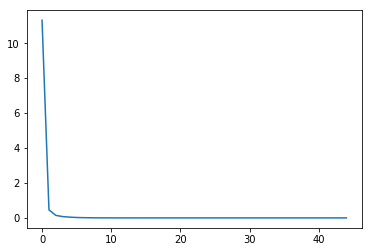

In [3]:
# Ax = e

x_k = np.float32(np.zeros_like(e))    # początkowy wektor rozwiązań

r_k = e - A@x_k # wektor 128x1
p_k = r_k  # wektor 128x1
epsilon = 1e-12
norm_gradient_list = list()
j=0

x_vector_list = [x_k]

#zdefiniuj r_k
while True:
    Apk = A@p_k
    
    alfa_k = (r_k.T@r_k)/(p_k.T@Apk)                # liczba
    r_k1 = r_k - alfa_k*Apk                         # wektor
    beta_k = (r_k1.T@r_k1)/(r_k.T@r_k)              # liczba
    p_k1 = r_k1 + beta_k*p_k                        # wektor 
    x_k1 = x_k + alfa_k*p_k                         # wektor
    
    norm_gradient = np.sqrt(r_k.T@r_k)
    
    norm_gradient_list.append(norm_gradient)
    x_vector_list.append(x_k1)

    j+=1
    
    if norm_gradient <= epsilon:
        break
    
    r_k = r_k1
    p_k = p_k1
    x_k = x_k1   
    
    
python_solution = alg.solve(A,e)    
print("Liczba iteracji: \n", j)
print("\n Rozwiązanie wyliczone: \n", x_k1)
print("\n Rozwiązanie z Pythona:\n", python_solution)
print("\n Różnica rozwiązania pomiędzy kodem a funkcja w Pythonie: \n", python_solution-x_k1)

plt.plot([i for i in range(j)],norm_gradient_list)
plt.show()

In [4]:
""" Z powodu skończonej dokładności kolejne generowane wektory nie są ściśle ortogonalne do poprzedników. Akumulacja błędów prowadzi do znaczengo spowolnienia metody"""

norma_k = python_solution-x_vector_list[-1]
norma_1 = python_solution-x_vector_list[1]

# sprawdzam warunek na szybkość zbieżności metody gradientów sprzężonych dla tej macierzy

kappa = 40
kappa_part = ((np.sqrt(kappa) - 1) / (np.sqrt(kappa) + 1))**(44)

if np.sqrt(norma_k.T@norma_k) <= 2*np.sqrt(norma_1.T@norma_1)*kappa_part:
    print("yes")
else:
    print("no")
    
"""Współczynnik uwarunkowania macierzy A - kappa wynosi 40, jest znacznie większy niż 1, co spowodowało znaczne spowolnienie metody. 
Po drugiej iteracji rozwiązanie: wektor x_k1 jest już blisko docelowego rozwiązania. Kolejne iteracje schodzą na uzyskaniu zadanej dokładności"""






yes


'Współczynnik uwarunkowania macierzy A - kappa wynosi 40, jest znacznie większy niż 1, co spowodowało znaczne spowolnienie metody. \nPo drugiej iteracji rozwiązanie: wektor x_k1 jest już blisko docelowego rozwiązania. Kolejne iteracje schodzą na uzyskaniu zadanej dokładności'